In [1]:
import geopandas as gpd

In [1]:
from dbfread import DBF

In [29]:
districts_layer = gpd.read_file('Datasets_Hackathon/Admin_layers/Assaba_Districts_layer.shp')

# Print the first few rows of the GeoDataFrame
districts_layer.head()


,FID_1,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry
0,71,El Ghabra,MR03106,None,Barkéol,MR031,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,1.064756,0.047306,558.684431,"POLYGON ((-12.43278 16.60025, -12.63382 16.484..."
1,77,Guerou,MR03301,None,Guerou,MR033,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,0.466595,0.009926,117.075519,"POLYGON ((-11.73593 16.81811, -11.87343 16.777..."
2,66,Barkeiwel,MR03101,None,Barkéol,MR031,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,0.539027,0.013975,164.969406,"POLYGON ((-12.47354 16.62812, -12.53268 16.668..."
3,91,Legrane,MR03506,None,Kiffa,MR035,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,2.794763,0.269195,3183.059156,"POLYGON ((-11.63276 16.28856, -11.66745 16.002..."
4,82,Sani,MR03402,None,Kankoussa,MR034,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,1.498810,0.131890,1560.970072,"POLYGON ((-11.18513 16.28856, -11.18472 16.141..."


In [30]:
#print out the shape of the dataset
districts_layer.shape

(26, 17)

In [31]:
region_layer=gpd.read_file('Datasets_Hackathon/Admin_layers/Assaba_Region_layer.shp')
region_layer.head()

,FID_1,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry
0,6,Boumdeid,MR032,None,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,3.975597,0.368397,4323.851319,"POLYGON ((-11.04988 17.46726, -11.1181 17.3996..."
1,7,Kankoussa,MR034,None,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,4.373495,0.874687,10369.305326,"POLYGON ((-10.89745 15.10986, -10.89839 15.108..."
2,8,Barkéol,MR031,Barkeol,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,4.190714,0.546288,6448.722910,"POLYGON ((-12.09018 16.73403, -12.08982 16.733..."
3,4,Guerou,MR033,None,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,2.499498,0.237509,2800.699987,"POLYGON ((-11.95212 17.09488, -11.923 17.08261..."
4,5,Kiffa,MR035,None,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,6.705719,1.020179,12041.829921,"POLYGON ((-10.83221 16.28856, -10.832 16.28824..."


In [32]:
region_layer.shape

(5, 15)

2. climate precipitation

In [8]:
import rasterio
from rasterio.plot import show

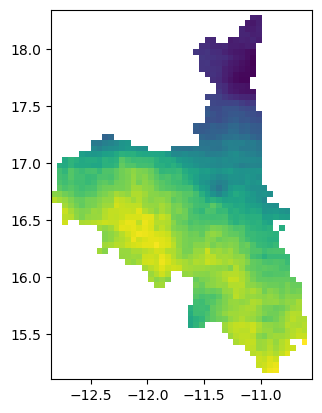

CRS (Coordinate Reference System): EPSG:4326
Transform: | 0.05, 0.00,-12.85|
| 0.00,-0.05, 18.35|
| 0.00, 0.00, 1.00|
Width: 46
Height: 65
Data shape: (65, 46)


In [26]:
# one exmaple for reading climate precipatation file
with rasterio.open('Datasets_Hackathon/Climate_Precipitation_Data/2010R.tif') as dataset:
    show(dataset)
    
    # get geographic information
    print("CRS (Coordinate Reference System):", dataset.crs)
    print("Transform:", dataset.transform)  
    print("Width:", dataset.width)
    print("Height:", dataset.height)
    
    # read data
    data = dataset.read(1)  # 读取第一波段
    print("Data shape:", data.shape)

In [17]:
import matplotlib.pyplot as plt
import os

d:\Anaconda\anaconda3\lib\site-packages\matplotlib\image.py:503: RuntimeWarning: overflow encountered in multiply
  A_resampled *= ((a_max - a_min) / frac)


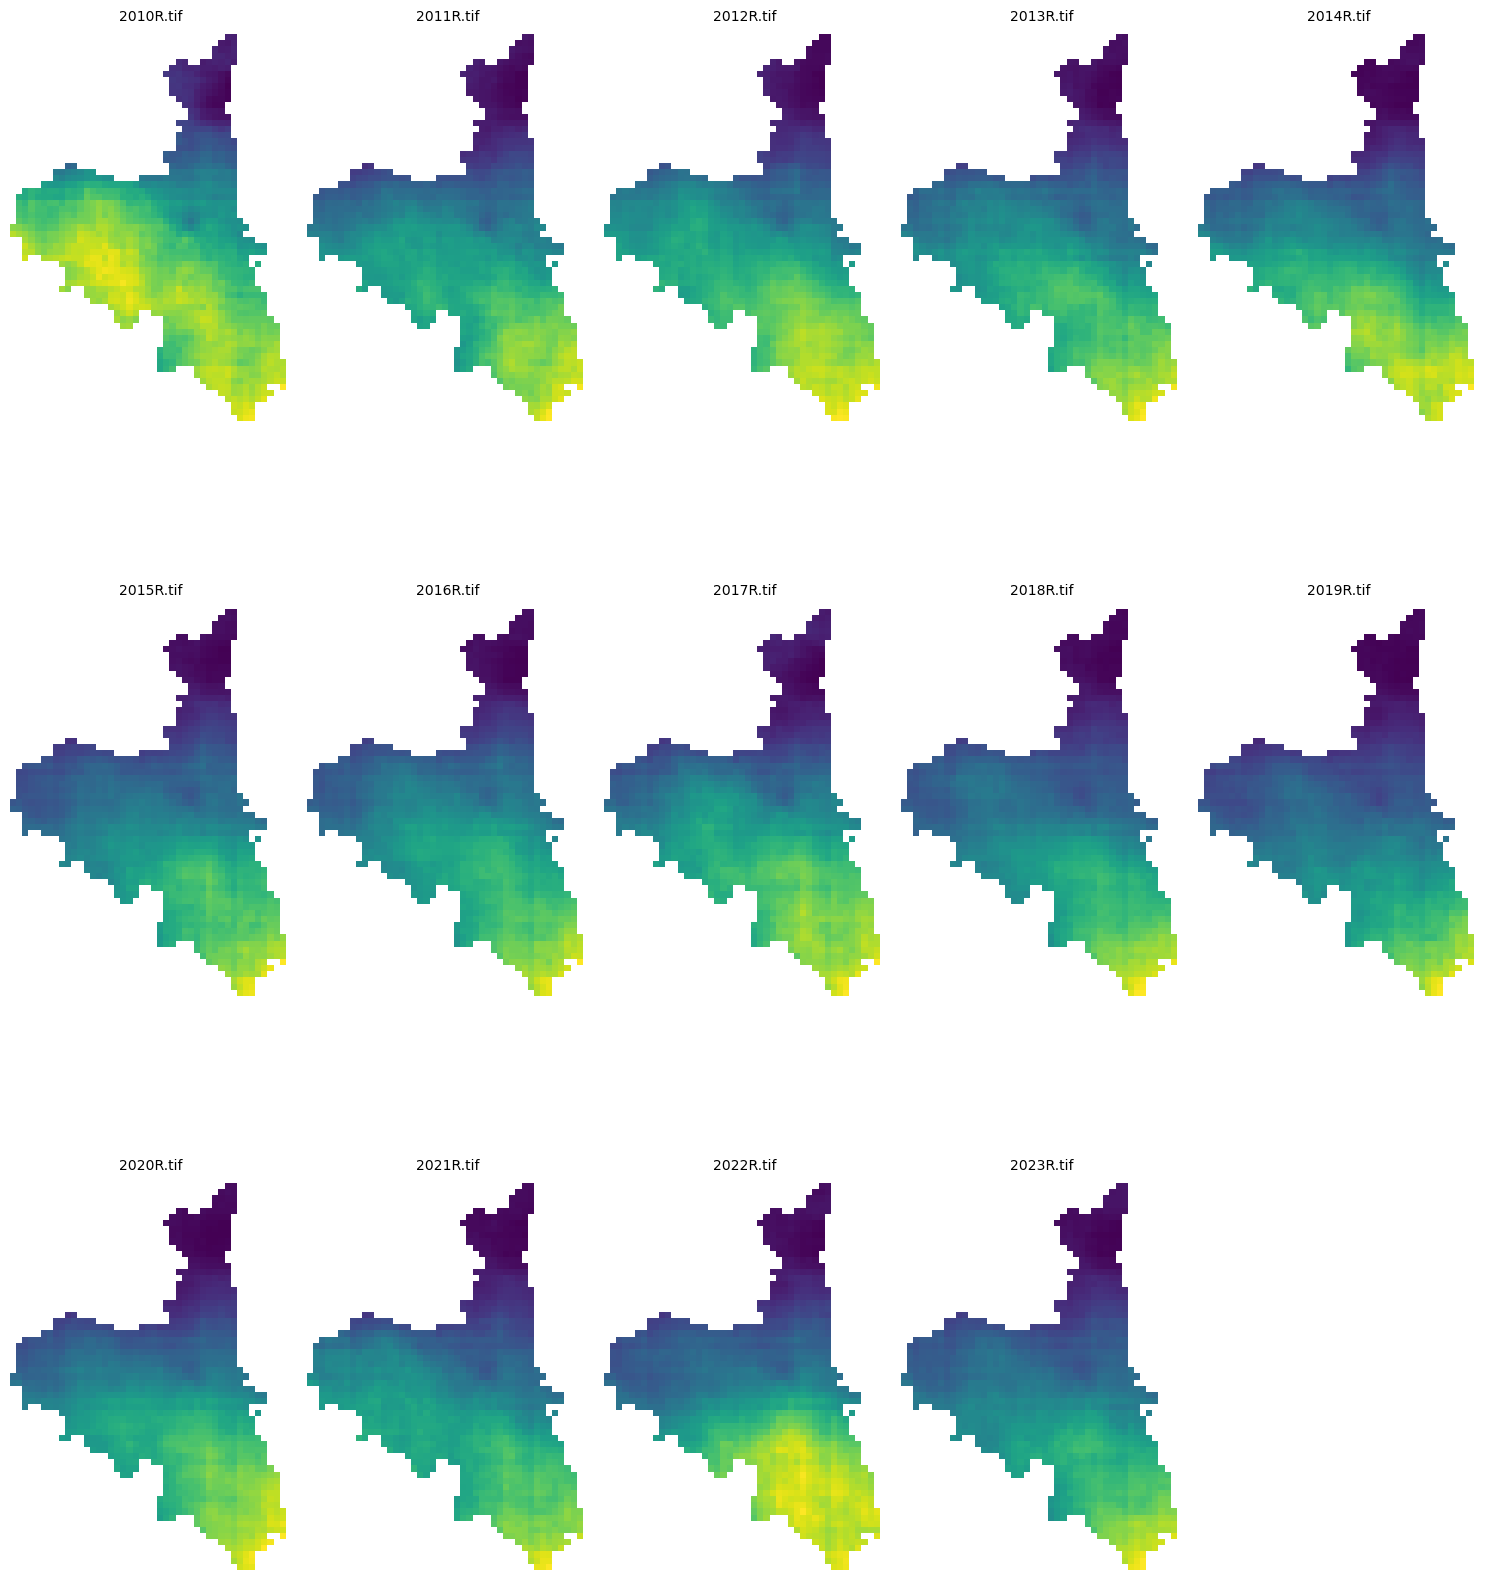

In [25]:
# path for GPP folder
folder_path = 'Datasets_Hackathon/Climate_Precipitation_Data/'

# path for all GPP tif files
tif_files = [f for f in os.listdir(folder_path) if f.endswith('.tif')]
tif_files = sorted(tif_files, key=lambda x: int(x[:4]))

num_columns = 5
num_rows = (len(tif_files) + num_columns - 1) // num_columns
plt.figure(figsize=(15, num_rows * 6))

for idx, tif_file in enumerate(tif_files):
    tif_path = os.path.join(folder_path, tif_file)
    
    with rasterio.open(tif_path) as dataset:
        ax = plt.subplot(num_rows, num_columns, idx + 1)
        show(dataset, ax=ax)
        ax.set_title(tif_file, fontsize=10)
        ax.set_axis_off()

plt.tight_layout()
plt.show()

In [ ]:
#import rasterio
from rasterio.windows import Window

# 读取栅格数据（GeoTIFF 或 NetCDF）
dataset = rasterio.open("Datasets_Hackathon/Climate_Precipitation_Data/2010R.tif")

# 设置切割网格大小（像素单位）
tile_width, tile_height = 40, 40  

# 生成子区域

for i in range(0, dataset.width, tile_width):
    for j in range(0, dataset.height, tile_height):
        window = Window(i, j, tile_width, tile_height)
        subset = dataset.read(window=window)
        
        # 保存为新图像
        out_meta = dataset.meta.copy()
        out_meta.update({"width": tile_width, "height": tile_height, "transform": dataset.window_transform(window)})
        
        with rasterio.open(f"tile_{i}_{j}.tif", "w", **out_meta) as dest:
            dest.write(subset)



In [40]:
print(dataset.height)

65


In [39]:

# 读取栅格数据（GeoTIFF 或 NetCDF）
dataset = rasterio.open("Datasets_Hackathon/Climate_Precipitation_Data/2010R.tif")

# 设置切割网格大小（像素单位）
tile_width, tile_height = 40, 40  

# 创建保存切割图像的文件夹
output_dir = "tiled_images/"
os.makedirs(output_dir, exist_ok=True)

# 计数变量
tile_count = 0

# 生成子区域并保存切割的图像
for i in range(0, dataset.width, tile_width):
    for j in range(0, dataset.height, tile_height):
        window = Window(i, j, tile_width, tile_height)
        subset = dataset.read(window=window)
        
        # 保存为新图像
        out_meta = dataset.meta.copy()
        out_meta.update({"width": tile_width, "height": tile_height, "transform": dataset.window_transform(window)})
        
        # 文件路径
        tile_filename = os.path.join(output_dir, f"tile_{i}_{j}.tif")
        
        # 保存切割后的图像
        with rasterio.open(tile_filename, "w", **out_meta) as dest:
            dest.write(subset)
        
        # 计数
        tile_count += 1

# 打印切割后的图像数量
print(f"Total number of tiles saved: {tile_count}")


Total number of tiles saved: 4


6. streamwater line road network

In [42]:
main_road=gpd.read_file('Datasets_Hackathon\Streamwater_Line_Road_Network\Main_Road.shp')
main_road.head()

,ID_,NAME1_,TYPE,LONG,geometry
0,RNB5,Sangrava - Letvetar,1,21155.67,"LINESTRING (-12.646 17.64222, -12.62673 17.649..."
1,RNB5,Letvetar - Moudjeria,1,23623.56,"LINESTRING (-12.3329 17.87742, -12.33913 17.88..."
2,RNB1,Boutilimit-Aleg,1,93970.39,"LINESTRING (-14.6988 17.5259, -14.6623 17.5238..."
3,RNB3,NKTT - Akjoujt,1,262372.09,"MULTILINESTRING ((-15.82551 18.47119, -15.8173..."
4,RNB2,NKTT - Rosso,1,197195.24,"LINESTRING (-15.96518 18.07919, -15.96914 18.0..."


In [43]:
main_road.shape

(41, 5)

In [46]:
print(type(main_road.loc[0, 'geometry']))

<class 'shapely.geometry.linestring.LineString'>


In [47]:
streamwater = gpd.read_file("Datasets_Hackathon\Streamwater_Line_Road_Network\Streamwater.shp")
streamwater.head()

,FID_1,name,name_en,waterway,covered,width,depth,layer,blockage,tunnel,natural,water,source,name_ar,osm_id,osm_type,geometry
0,9539,None,None,stream,None,None,None,None,None,None,None,None,None,None,1.336799e+09,ways_line,"LINESTRING (-11.41043 16.48706, -11.40772 16.4..."
1,1639,None,None,stream,None,None,None,None,None,None,None,None,None,None,6.857615e+08,ways_line,"LINESTRING (-10.89422 15.29227, -10.89333 15.2..."
2,2477,None,None,weir,None,None,None,None,None,None,None,None,None,None,4.068417e+08,ways_line,"LINESTRING (-12.48389 16.71024, -12.48411 16.7..."
3,4230,None,None,stream,None,None,None,None,None,None,None,None,None,None,4.701723e+08,ways_line,"LINESTRING (-11.52531 15.89005, -11.52522 15.8..."
4,5242,None,None,stream,None,None,None,None,None,None,None,None,None,None,4.701723e+08,ways_line,"LINESTRING (-11.52904 15.88542, -11.52899 15.8..."


In [49]:
streamwater.shape

(488, 17)

In [51]:
print(streamwater.loc[0, 'geometry'])

LINESTRING (-11.4104309 16.4870553, -11.4077187 16.4893927, -11.4051094 16.4891128, -11.4028092 16.4908905, -11.3997536 16.4915983, -11.3986893 16.4911374, -11.3982945 16.4904461, -11.3972988 16.4904297, -11.3967667 16.4908247, -11.395977 16.4911045, -11.3950501 16.4910058, -11.3941918 16.4901169, -11.391016 16.4904955, -11.3864842 16.4910222, -11.380476 16.4906107)


calculate distance between main road and streamwater

In [57]:
import pyproj

In [74]:
#import geopandas as gpd

# Convert DataFrames to GeoDataFrames
gdf_roads = gpd.GeoDataFrame(main_road, geometry="geometry")  # Assuming "road_geometry" column
gdf_streams = gpd.GeoDataFrame(streamwater, geometry="geometry")  # Assuming "stream_geometry" column


In [75]:
if gdf_streams.crs == gdf_roads.crs:
    print(gdf_roads.crs)

EPSG:4326


In [ ]:
#convert to projected CRS
gdf_roads = gdf_roads.to_crs("EPSG:32628")
gdf_streams = gdf_streams.to_crs("EPSG:32628")

In [77]:
# Compute Distance Between Roads and Streams
gdf_streams["distance_to_road"] = gdf_streams.geometry.apply(lambda stream: gdf_roads.distance(stream).min())

In [78]:
#To find where streams cross roads:
gdf_streams["intersects_road"] = gdf_streams.geometry.apply(lambda stream: gdf_roads.intersects(stream).any())

In [80]:
#Identify Intersections (Streams Crossing Roads)
buffered_roads = gdf_roads.buffer(500)  # 500 meters buffer around roads
streams_near_roads_1 = gdf_streams[gdf_streams.geometry.intersects(buffered_roads.union_all())]

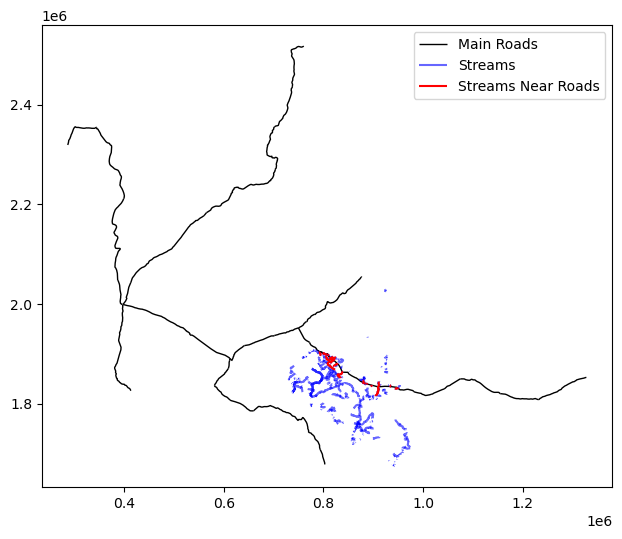

In [81]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
gdf_roads.plot(ax=ax, color="black", linewidth=1, label="Main Roads")
gdf_streams.plot(ax=ax, color="blue", alpha=0.6, label="Streams")
streams_near_roads_1.plot(ax=ax, color="red", label="Streams Near Roads")

plt.legend()
plt.show()


In [84]:
def read_tfw(tfw_file):
    with open(tfw_file, 'r') as f:
        lines = f.readlines()
    
    # 解析TFW文件的6个参数
    A = float(lines[0].strip())
    D = float(lines[1].strip())
    B = float(lines[2].strip())
    E = float(lines[3].strip())
    C = float(lines[4].strip())
    F = float(lines[5].strip())
    
    print("TFW文件参数解析：")
    print(f"像素宽度 (A): {A}")
    print(f"旋转参数 (D): {D}")
    print(f"旋转参数 (B): {B}")
    print(f"像素高度 (E): {E}")
    print(f"左上角X坐标 (C): {C}")
    print(f"左上角Y坐标 (F): {F}")
    
    return A, D, B, E, C, F

# 使用示例
tfw_params = read_tfw('Datasets_Hackathon\Gridded_Population_Density_Data\Assaba_Pop_2010.tfw')

TFW文件参数解析：
像素宽度 (A): 0.0083333333
旋转参数 (D): 0.0
旋转参数 (B): 0.0
像素高度 (E): -0.0083333333
左上角X坐标 (C): -12.8387499505
左上角Y坐标 (F): 18.3120834571


In [85]:
# read tif file
with rasterio.open('Datasets_Hackathon\Gridded_Population_Density_Data\Assaba_Pop_2010.tif') as dataset:
    # Get the CRS (Coordinate Reference System)
    crs = dataset.crs
    print(f"CRS: {crs}")

    # Get the affine transform (this includes the scaling factor, origin, etc.)
    transform = dataset.transform
    print(f"Affine Transform: {transform}")

    # Read the image data (you can access pixel values here)
    data = dataset.read(1)  # Read the first band (assuming single-band image)

CRS: EPSG:4326
Affine Transform: | 0.01, 0.00,-12.84|
| 0.00,-0.01, 18.32|
| 0.00, 0.00, 1.00|


In [86]:
from rasterio.transform import xy

# Example pixel coordinates (row, column)
row = 100  # example row
col = 100  # example column

# Convert pixel to geographic coordinates (longitude, latitude)
longitude, latitude = xy(transform, row, col)
print(f"Longitude: {longitude}, Latitude: {latitude}")


Longitude: -12.005416620546256, Latitude: 17.478750127077152


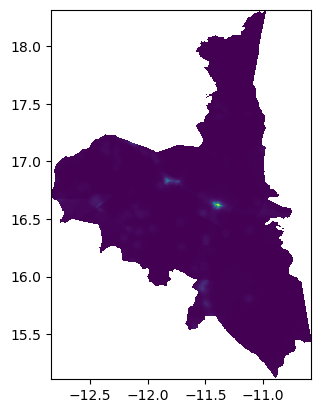

CRS (Coordinate Reference System): EPSG:4326
Transform: | 0.01, 0.00,-12.84|
| 0.00,-0.01, 18.32|
| 0.00, 0.00, 1.00|
Width: 271
Height: 385
Data shape: (385, 271)


In [88]:
# one exmaple for reading climate precipatation file
with rasterio.open('Datasets_Hackathon\Gridded_Population_Density_Data\Assaba_Pop_2010.tif') as dataset_GPD:
    show(dataset_GPD)
    
    # get geographic information
    print("CRS (Coordinate Reference System):", dataset_GPD.crs)
    print("Transform:", dataset_GPD.transform)  
    print("Width:", dataset_GPD.width)
    print("Height:", dataset_GPD.height)
    
    # read data
    data_gpd = dataset_GPD.read(1)  # 读取第一波段
    print("Data shape:", data_gpd.shape)

In [89]:
from rasterio.transform import xy

# Example pixel coordinates (row, column)
row = 271  # example row
col = 385  # example column

# Convert pixel to geographic coordinates (longitude, latitude)
longitude, latitude = xy(transform, row, col)
print(f"Longitude: {longitude}, Latitude: {latitude}")


Longitude: -9.630416630046255, Latitude: 16.05375013277715


In [90]:
from rasterio.transform import xy

# Using the transform from your TIF file
transform = [0.01, 0.00, -12.84, 0.00, -0.01, 18.32, 0.00, 0.00, 1.00]

# To get the coordinates at different positions:
# Top-left corner
row, col = 0, 0
lon_tl, lat_tl = xy(transform, row, col)

# Bottom-right corner
row, col = 384, 270  # Height-1, Width-1
lon_br, lat_br = xy(transform, row, col)

# Center of the image
row, col = 384//2, 270//2
lon_center, lat_center = xy(transform, row, col)

print(f"Top-left: Longitude: {lon_tl}, Latitude: {lat_tl}")
print(f"Bottom-right: Longitude: {lon_br}, Latitude: {lat_br}")
print(f"Center: Longitude: {lon_center}, Latitude: {lat_center}")

ValueError: GCPTransformer requires sequence of GroundControlPoint

In [91]:
from rasterio.warp import transform_bounds
import pyproj

In [95]:

# 1. 读取Shapefile并获取边界信息 stream water
def get_shapefile_bounds(shp_path):
    gdf = gpd.read_file(shp_path)
    
    # 获取CRS信息
    crs = gdf.crs
    print(f"Shapefile CRS: {crs}")
    
    # 获取边界框（minx, miny, maxx, maxy）
    bounds = gdf.total_bounds
    print(f"Shapefile Bounds: {bounds}")
    
    # 如果需要将坐标转换为WGS84经纬度
    if crs != "EPSG:4326":
        transformer = pyproj.Transformer.from_crs(crs, "EPSG:4326", always_xy=True)
        minx, miny = transformer.transform(bounds[0], bounds[1])
        maxx, maxy = transformer.transform(bounds[2], bounds[3])
        wgs84_bounds = (minx, miny, maxx, maxy)
        print(f"Shapefile Bounds (WGS84): {wgs84_bounds}")
    
    return bounds, crs

# 2. 读取GeoTIFF并获取边界信息 2010_GP GPP
def get_geotiff_bounds(tif_path):
    with rasterio.open(tif_path) as src:
        # 获取CRS信息
        crs = src.crs
        print(f"GeoTIFF CRS: {crs}")
        
        # 获取边界框
        bounds = src.bounds
        print(f"GeoTIFF Bounds: {bounds}")
        
        # 如果需要将坐标转换为WGS84经纬度
        if crs != "EPSG:4326":
            wgs84_bounds = transform_bounds(crs, "EPSG:4326", 
                                           bounds.left, bounds.bottom, 
                                           bounds.right, bounds.top)
            print(f"GeoTIFF Bounds (WGS84): {wgs84_bounds}")
        
        return bounds, crs

# 使用示例
shapefile_bounds, shapefile_crs = get_shapefile_bounds('Datasets_Hackathon\Streamwater_Line_Road_Network\Main_Road.shp')
geotiff_bounds, geotiff_crs = get_geotiff_bounds(r"C:\Users\HUAWEI\Desktop\hackthon\START_Hackathon\Datasets_Hackathon\MODIS_Gross_Primary_Production_GPP\2010_GP.tif")

# 检查两个数据集是否使用相同的坐标系统
if shapefile_crs == geotiff_crs:
    print("两个数据集使用相同的坐标系统")
else:
    print("两个数据集使用不同的坐标系统")

Shapefile CRS: EPSG:4326
Shapefile Bounds: [-17.05212274  15.15972053  -7.25776475  22.74846276]
GeoTIFF CRS: PROJCS["unnamed",GEOGCS["GCS_Unknown_datum_based_upon_the_custom_spheroid",DATUM["D_Not_specified_based_on_custom_spheroid",SPHEROID["Custom_spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
GeoTIFF Bounds: BoundingBox(left=-1378818.64438684, bottom=1679971.9101297148, right=-1117046.9595488026, top=2036259.3891393621)
GeoTIFF Bounds (WGS84): (-13.061472785182145, 15.108333331976493, -10.405502310243788, 18.312499998353495)
两个数据集使用不同的坐标系统


In [101]:
streams_reprojected = gdf_streams.to_crs(geotiff_crs)

# Save the reprojected Shapefile
streams_reprojected.to_file("streams_reprojected.shp")

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_69604\881310172.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  streams_reprojected.to_file("streams_reprojected.shp")
d:\Anaconda\anaconda3\lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'distance_to_road' to 'distance_t'
  ogr_write(
d:\Anaconda\anaconda3\lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'intersects_road' to 'intersects'
  ogr_write(
d:\Anaconda\anaconda3\lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 1336799474 of field osm_id of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
d:\Anaconda\anaconda3\lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 685761456 of field osm_id of feature 1 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
d:\Anaconda\anacon

In [103]:
road_reprojected = gdf_roads.to_crs(geotiff_crs)

# Save the reprojected Shapefile
road_reprojected.to_file('road_reprojected.shp')

In [104]:
stream_re = gpd.read_file("streams_reprojected.shp")
stream_re.head()

,FID_1,name,name_en,waterway,covered,width,depth,layer,blockage,tunnel,natural,water,source,name_ar,osm_id,osm_type,distance_t,intersects,geometry
0,9539,None,None,stream,None,None,None,None,None,None,None,None,None,None,1.336799e+09,ways_line,12705.225233,False,"LINESTRING (-1216616.001 1833278.971, -1216312..."
1,1639,None,None,stream,None,None,None,None,None,None,None,None,None,None,6.857615e+08,ways_line,132816.657459,False,"LINESTRING (-1168492.185 1700424.824, -1168395..."
2,2477,None,None,weir,None,None,None,None,None,None,None,None,None,None,4.068417e+08,ways_line,59959.902725,False,"LINESTRING (-1329527.302 1858095.616, -1329549..."
3,4230,None,None,stream,None,None,None,None,None,None,None,None,None,None,4.701723e+08,ways_line,80911.521371,False,"LINESTRING (-1232587.981 1766894.469, -1232577..."
4,5242,None,None,stream,None,None,None,None,None,None,None,None,None,None,4.701723e+08,ways_line,80873.124249,False,"LINESTRING (-1233015.092 1766379.58, -1233009...."


In [108]:
road_re = gpd.read_file("road_reprojected.shp")
print(road_re.loc[0, 'geometry'])

LINESTRING (-1340037.3682505565 1961727.6800594036, -1337938.117425602 1962582.435772664, -1336093.6112044444 1963778.0119706932, -1334223.2751046596 1964460.5259677512, -1331078.2663412346 1966484.0579239815, -1329679.046970249 1967795.81927006, -1328494.9473701834 1969740.3900535756, -1327982.0189508782 1970582.3670945656, -1326615.3665590843 1971306.0298420258, -1325307.353511381 1972978.7258800885, -1324059.432262851 1973527.0332371462, -1322770.9058268857 1973849.1656225964)
